In [1]:
import pandas as pd
df = pd.read_csv("car data.csv")  # or your file name
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
df.drop("Car_Name", axis=1, inplace=True)


In [3]:
df["Car_Age"] = 2024 - df["Year"]
df.drop("Year", axis=1, inplace=True)


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [5]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [8]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.6440655737704908
R2 Score: 0.9581003758194122


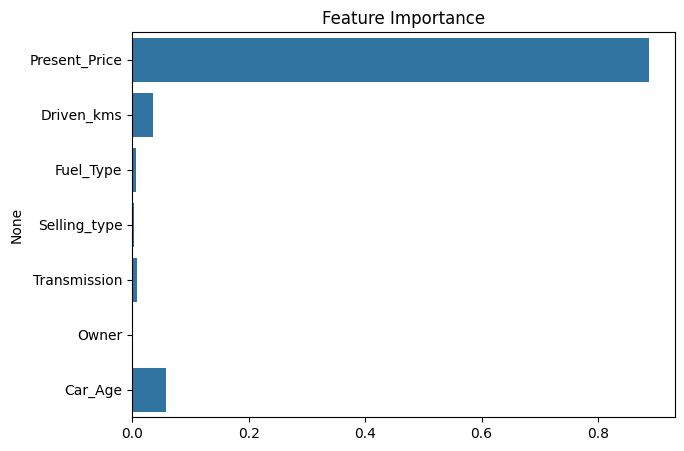

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(7,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


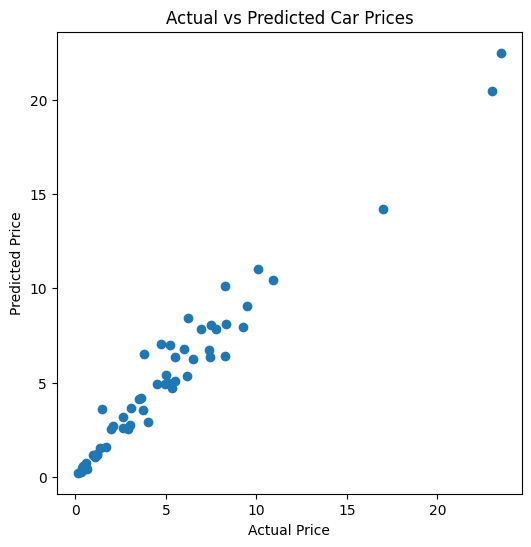

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [11]:
sample_data = [[
    8.5,      # Present_Price
    35000,    # Driven_kms
    1,        # Fuel_Type (Petrol = 1 if encoded, check your encoding)
    0,        # Selling_type (Dealer = 0 usually)
    1,        # Transmission (Manual = 1 usually)
    0,        # Owner
    5         # Car_Age
]]

predicted_price = model.predict(sample_data)
print("Predicted Selling Price:", predicted_price[0], "lakhs")

Predicted Selling Price: 6.705250000000004 lakhs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
